### 기본 데이터 준비

* 행정구역별 인구수 정보 가져오기

In [8]:
import pandas as pd
# 지수표현식 대신 실수표현식으로 표시 옵션
pd.options.display.float_format = '{:.5f}'.format

# csv 파일을 DataFrame 으로 가져오기
popul = pd.read_csv('./population_20220726.csv', encoding='cp949', engine='python')

popul.head()

,시도,군구,총인구수,남자인구수,여자인구수
0,전국,소계,51578178,25711784,25866394
1,서울특별시,소계,9494807,4605655,4889152
2,서울특별시,종로구,143624,69513,74111
3,서울특별시,중구,122088,59364,62724
4,서울특별시,용산구,222263,106743,115520


In [9]:
# 시도군구 컬럼 만들기
popul['시도군구'] = popul.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)

popul.head()

,시도,군구,총인구수,남자인구수,여자인구수,시도군구
0,전국,소계,51578178,25711784,25866394,전국 소계
1,서울특별시,소계,9494807,4605655,4889152,서울특별시 소계
2,서울특별시,종로구,143624,69513,74111,서울특별시 종로구
3,서울특별시,중구,122088,59364,62724,서울특별시 중구
4,서울특별시,용산구,222263,106743,115520,서울특별시 용산구


In [10]:
# 컬럼값이 '소계'인 행은 제외
popul = popul[popul.군구 != '소계']

# 시도군구를 인덱스로 설정
popul = popul.set_index("시도군구")
popul.head()

,시도,군구,총인구수,남자인구수,여자인구수
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,143624,69513,74111
서울특별시 중구,서울특별시,중구,122088,59364,62724
서울특별시 용산구,서울특별시,용산구,222263,106743,115520
서울특별시 성동구,서울특별시,성동구,283821,138162,145659
서울특별시 광진구,서울특별시,광진구,339893,163920,175973


### 각자 원하는 데이터 가져오기

* 지역별 현황을 파악할 수 있는 정보를 공공데이터로 가져오기
* 아래 코드를 이용하여 적절히 데이터 전처리 수행 후 데이터 분석하기

In [50]:
# 행정구역별 공공보건 의료기관 데이터 가져오기
df = pd.read_csv('./camping_data.csv', index_col=0, encoding='cp949', engine='python')
df.head()

,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,...,의무실유무,안내소유무,기획여행보험시작일자,기획여행보험종료일자,자본금,보험시작일자,보험종료일자,부대시설내역,시설규모,Unnamed: 63
번호,,,,,,,,,,,,,,,,,,,,,
1,일반야영장업,03_11_07_P,5050000,CDFI2262132019000002,20190319,NaN,3,폐업,3,폐업,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,일반야영장업,03_11_07_P,4250000,CDFI2262132019000002,20190308,NaN,3,폐업,3,폐업,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.00000,NaN
3,일반야영장업,03_11_07_P,4050000,CDFI2262132019000001,20190312,NaN,3,폐업,3,폐업,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2032.00000,NaN
4,일반야영장업,03_11_07_P,3450000,CDFI2262132019000001,20190501,NaN,3,폐업,3,폐업,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8500.00000,NaN
5,일반야영장업,03_11_07_P,4780000,CDFI2262132019000001,20190509,NaN,3,폐업,3,폐업,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data = df[df.상세영업상태명 == '영업중']
data.head()

,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,...,의무실유무,안내소유무,기획여행보험시작일자,기획여행보험종료일자,자본금,보험시작일자,보험종료일자,부대시설내역,시설규모,Unnamed: 63
번호,,,,,,,,,,,,,,,,,,,,,
674,일반야영장업,03_11_07_P,3730000,CDFI2262132018000004,20180919,NaN,1,영업/정상,13,영업중,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.00000,NaN
675,일반야영장업,03_11_07_P,5470000,CDFI2262132019000001,20190115,NaN,1,영업/정상,13,영업중,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,일반야영장업,03_11_07_P,5600000,CDFI2262132019000001,20190123,NaN,1,영업/정상,13,영업중,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677,일반야영장업,03_11_07_P,4160000,CDFI2262132019000001,20190115,NaN,1,영업/정상,13,영업중,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236.00000,NaN
678,일반야영장업,03_11_07_P,5340000,CDFI2262132019000001,20190118,NaN,1,영업/정상,13,영업중,...,NaN,NaN,NaN,NaN,20000000.00000,NaN,NaN,NaN,112.00000,NaN


In [54]:
data_new = data[['소재지전체주소']]
data_new.columns = ['주소']
data_new.head()

,주소
번호,
674,울산광역시 울주군 상북면 등억알프스리 309-1
675,경상남도 거창군 북상면 월성리 941-4번지
676,경기도 포천시 이동면 도평리 333번지
677,경기도 가평군 가평읍 복장리 580-3번지
678,경상남도 사천시 서포면 비토리 255-31


In [55]:
# 주소에서 시도, 군구 정보 분리
# apply() 함수는 데이터프레임의 행 또는 열 또는 전체 셀에 원하는 연산
addr = pd.DataFrame(data_new['주소'].apply(lambda v: v.split()[:2]).tolist(), columns = ('시도', '군구'))

addr.head()

,시도,군구
0,울산광역시,울주군
1,경상남도,거창군
2,경기도,포천시
3,경기도,가평군
4,경상남도,사천시


In [56]:
# 시도 이름에서 잘못된 내용이 있는지 확인하기 위해 시도 이름의 유일한 값을 출력하여 확인함
addr['시도'].unique()

array(['울산광역시', '경상남도', '경기도', '강원도', '충청북도', '충청남도', '인천광역시', '경상북도',
       '세종특별자치시', '전라남도', '전라북도', '제주특별자치도', '대구광역시', '서울특별시', '부산광역시',
       '광주광역시', '대전광역시'], dtype=object)

In [57]:
addr['군구'].unique()

array(['울주군', '거창군', '포천시', '가평군', '사천시', '홍천군', '영동군', '남양주시', '안산시',
       '괴산군', '태안군', '부여군', '여주시', '함양군', '의정부시', '예산군', '남동구', '파주시',
       '강릉시', '청주시', '청도군', '논산시', '충주시', '경주시', '연기면', '양구군', '영월군',
       '서산시', '곡성군', '인제군', '정읍시', '안동시', '문경시', '하동군', '김제시', '안성시',
       '강화군', '보령시', '천안시', '원주시', '옹진군', '정선군', '옥천군', '평택시', '고령군',
       '여수시', '양양군', '제천시', '안양시', '속초시', '진안군', '제주시', '동해시', '평창군',
       '해남군', '삼척시', '이천시', '포항시', '울진군', '양주시', '동두천시', '양평군', '창녕군',
       '상주시', '하남시', '임실군', '담양군', '영암군', '함평군', '중구', '서천군', '춘천시',
       '영덕군', '부안군', '경산시', '김천시', '연천군', '성남시', '칠곡군', '구미시', '보성군',
       '장성군', '달성군', '횡성군', '화순군', '고흥군', '용인시', '진천군', '아산시', '철원군',
       '영천시', '단양군', '거제시', '밀양시', '군위군', '양산시', '합천군', '영주시', '완주군',
       '창원시', '보은군', '광주시', '김포시', '산청군', '공주시', '당진시', '금산군', '장흥군',
       '무주군', '서초구', '청양군', '고성군', '신안군', '봉화군', '서귀포시', '순창군', '성주군',
       '조치원읍', '음성군', '남해군', '시흥시', '나주시', '통영시', '홍성군', '화천군', '구로구',
       '의성군', '화

In [58]:
addr[addr['군구'] == '조치원읍']

,시도,군구
398,세종특별자치시,조치원읍


In [59]:
addr.iloc[75] = ['세종특별자치시', '세종시']

In [60]:
addr.iloc[75]

시도    세종특별자치시
군구        세종시
Name: 75, dtype: object

In [61]:
# 행정구역별 공공보건의료기관 수 구하기
# 행 단위로 집계하기 위해 axis = 1 로 설정
addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
addr.head()

,시도,군구,시도군구
0,울산광역시,울주군,울산광역시 울주군
1,경상남도,거창군,경상남도 거창군
2,경기도,포천시,경기도 포천시
3,경기도,가평군,경기도 가평군
4,경상남도,사천시,경상남도 사천시


In [62]:
# count 열 만들기
addr['count'] = 0
addr.head()

,시도,군구,시도군구,count
0,울산광역시,울주군,울산광역시 울주군,0
1,경상남도,거창군,경상남도 거창군,0
2,경기도,포천시,경기도 포천시,0
3,경기도,가평군,경기도 가평군,0
4,경상남도,사천시,경상남도 사천시,0


In [63]:
# groupby 로 지역 그룹별 집계내기
addr_group = pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index = False).count())
addr_group.head()

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,25
1,강원도,고성군,강원도 고성군,24
2,강원도,동해시,강원도 동해시,2
3,강원도,삼척시,강원도 삼척시,14
4,강원도,속초시,강원도 속초시,2


In [64]:
# 인덱스를 시도군구로 변경
addr_group = addr_group.set_index('시도군구')
addr_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,25
강원도 고성군,강원도,고성군,24
강원도 동해시,강원도,동해시,2
강원도 삼척시,강원도,삼척시,14
강원도 속초시,강원도,속초시,2


In [65]:
# 시도군구별 병원 수와 시도군구별 인구수 데이터 병합
# join, 양쪽 객체 모두가 공통으로 갖는 인덱스를 기준으로 가져옴
addr_popul_merge = pd.merge(addr_group, popul, how='inner', left_index=True, right_index=True)
addr_popul_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수,남자인구수,여자인구수
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,25,강원도,강릉시,212277,105308,106969
강원도 고성군,강원도,고성군,24,강원도,고성군,27331,14098,13233
강원도 동해시,강원도,동해시,2,강원도,동해시,89574,45553,44021
강원도 삼척시,강원도,삼척시,14,강원도,삼척시,64165,32450,31715
강원도 속초시,강원도,속초시,2,강원도,속초시,82848,41100,41748


In [66]:
# 필요한 컬럼만 추출
local_MC_Popul = addr_popul_merge[['시도_x', '군구_x', 'count', '총인구수']]
local_MC_Popul.head()

,시도_x,군구_x,count,총인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,25,212277
강원도 고성군,강원도,고성군,24,27331
강원도 동해시,강원도,동해시,2,89574
강원도 삼척시,강원도,삼척시,14,64165
강원도 속초시,강원도,속초시,2,82848


In [67]:
# 컬럼 이름 변경
local_MC_Popul = local_MC_Popul.rename(columns = {'시도_x':'시도', '군구_x':'군구', '총인구수':'인구수'})

# 인구수 대비 공공보건의료기관 비율 계산
MC_count = local_MC_Popul['count']
MC_count.head()
# axis = 0 은 행을 기준으로 레이블을 나눔
local_MC_Popul['MC_ratio'] = MC_count.div(local_MC_Popul['인구수'], axis = 0) * 100000

local_MC_Popul.head()

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,25,212277,11.77706
강원도 고성군,강원도,고성군,24,27331,87.81237
강원도 동해시,강원도,동해시,2,89574,2.23279
강원도 삼척시,강원도,삼척시,14,64165,21.81875
강원도 속초시,강원도,속초시,2,82848,2.41406


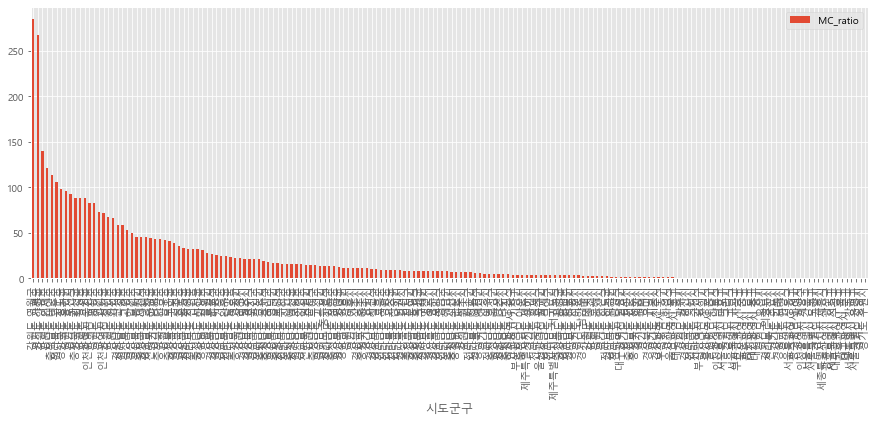

In [68]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
import numpy as np
plt.style.use('ggplot')

# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (15, 5)

# 바 차트 그리기
MC_ratio = local_MC_Popul[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False)
MC_ratio.plot(kind='bar', rot = 90)
#MC_ratio[:10].plot(kind='bar', rot = 90) # 상위 10개만 출력
#MC_ratio[-10:].plot(kind='bar', rot = 90) # 하위 10개만 출력
plt.show()

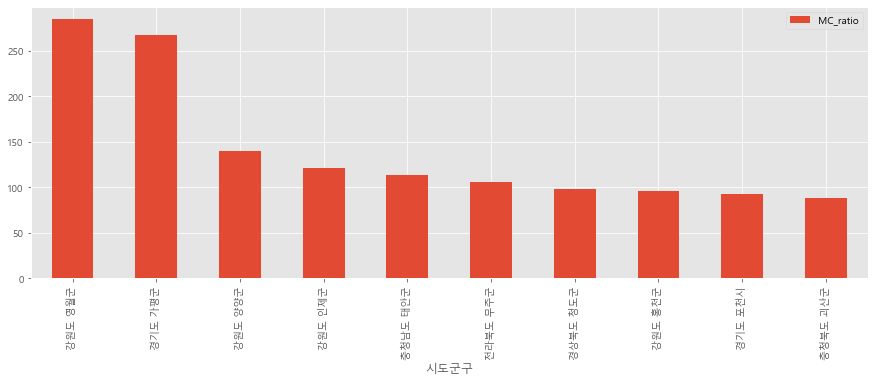

In [69]:
MC_ratio[:10].plot(kind='bar', rot = 90) # 상위 10개만 출력
plt.show()

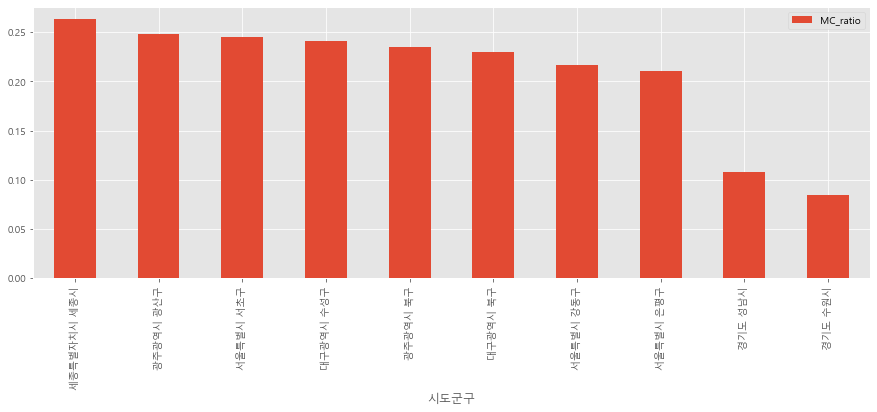

In [70]:
MC_ratio[-10:].plot(kind='bar', rot = 90) # 하위 10개만 출력
plt.show()